https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
def get_grid_surface(xx1, xx2, z, color='#0066FF'):
    lines = []
    line_marker = dict(color=color, width=2)
    for i, j, k in zip(xx1, xx2, z):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    
    for i, j, k in zip(xx1.T, xx2.T, z.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker)) 
    return lines

def get_predictive_surface(model, X, y, shape=(50, 50), feature_mode=True):

  x1 = np.linspace(X[:, 0].min() , X[:, 0].max(), shape[0])
  x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), shape[1])
  xx1, xx2 = np.meshgrid(x1, x2)

  x_test = np.c_[xx1.ravel(), xx2.ravel()]
  if feature_mode != True:
    x_test = x_test.reshape(-1, 2, 1)
  y_pred = model.predict(x_test)
  y_pred = y_pred.reshape(shape)
  
  return xx1, xx2, y_pred, X, y

def plot_predictive_surface(xx1, xx2, y_pred, X=None, y=None, grid_style=False):

  if grid_style:
    data = get_grid_surface(xx1, xx2, y_pred)
  else:
    data = [go.Surface(x=xx1, y=xx2, z=y_pred)]
  
  if X is not None and y is not None:
    scattered = X.reshape(-1, 2)
    data.append(go.Scatter3d(x=scattered[:, 0], y=scattered[:, 1], z=y, mode="markers"))

  fig = go.Figure(data=data)
  fig.show()

In [ ]:
X = np.array([[1, -1], [-2, -1], [3, 2], [1, 1]])
X

array([[ 1, -1],
       [-2, -1],
       [ 3,  2],
       [ 1,  1]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.90236807, 0.09763193]), 1.0)

explained_variance_ratio_ndarray of shape (n_components,)

    Percentage of variance explained by each of the selected components.


singular_values_ndarray of shape (n_components,)

    The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.

In [ ]:
# Roots of the above, not normaliezed
pca.singular_values_

array([4.19477978, 1.37979078])

In [ ]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(X)
pca.explained_variance_ratio_

array([0.90236807])

In [ ]:
pca.singular_values_

array([4.19477978])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.90236807, 0.09763193])

In [ ]:
pca.singular_values_

array([4.19477978, 1.37979078])

In [ ]:
pca.transform(X)

array([[ 0.48680684,  1.17814223],
       [ 2.98091651, -0.48901611],
       [-2.84309129, -0.20452855],
       [-0.62463206, -0.48459756]])

In [ ]:
X

array([[ 1, -1],
       [-2, -1],
       [ 3,  2],
       [ 1,  1]])

In [ ]:
X.T @ X


array([[15,  8],
       [ 8,  7]])

In [ ]:
pca.get_covariance()

array([[4.25      , 2.41666667],
       [2.41666667, 2.25      ]])

In [ ]:
(X.T @ X) / pca.get_covariance()

array([[3.52941176, 3.31034483],
       [3.31034483, 3.11111111]])

In [ ]:
pca.inverse_transform(pca.transform(X))

array([[ 1., -1.],
       [-2., -1.],
       [ 3.,  2.],
       [ 1.,  1.]])

In [ ]:
pca.iterated_power

'auto'

In [ ]:
pca.mean_

array([0.75, 0.25])

In [ ]:
np.mean(X, axis=0)

array([0.75, 0.25])

In [ ]:
np.mean(pca.transform(X), axis=0)

array([ 0.00000000e+00, -5.55111512e-17])

In [ ]:
pca.n_components, pca.n_components_

(2, 2)

In [ ]:
pca.n_features_

2

In [ ]:
pca.n_samples_

4

In [ ]:
pca.noise_variance_

0.0

In [ ]:
pca.tol

0.0

In [ ]:
pca.whiten

False

In [ ]:
print(pca.whiten.__doc__)

bool(x) -> bool

Returns True when the argument x is true, False otherwise.
The builtins True and False are the only two instances of the class bool.
The class bool is a subclass of the class int, and cannot be subclassed.


In [ ]:
pca.transform(X).T @ pca.transform(X)

array([[1.75961774e+01, 1.71454813e-15],
       [1.71454813e-15, 1.90382259e+00]])

In [ ]:
y = np.array([1, 2, 6, 4])

regX = LinearRegression()
regX.fit(X, y)
regX.coef_, regX.intercept_

(array([-0.24626866,  1.70895522]), 3.0074626865671643)

In [ ]:
plot_predictive_surface(*get_predictive_surface(regX, X, y))

In [ ]:
regZ = LinearRegression()
pca = PCA(n_components=2)
Z = pca.fit_transform(X)
regZ.fit(Z, y)
regZ.coef_, regZ.intercept_

(array([-0.74495931, -1.5576302 ]), 3.2499999999999996)

In [ ]:
plot_predictive_surface(*get_predictive_surface(regZ, Z, y))


In [ ]:
xx1, xx2, y_pred, X, y = get_predictive_surface(regX, X, y)
surface1 = go.Surface(x=xx1, y=xx2, z=y_pred, name='X', showscale=False)
xx1, xx2, y_pred, X, y = get_predictive_surface(regZ, X, y)
surface2 = go.Surface(x=xx1, y=xx2, z=y_pred, name='Z', showscale=False)
scatter = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode="markers")
fig = go.Figure(data=[surface1, surface2, scatter])
fig.show()

In [ ]:
regX.coef_, regX.intercept_

(array([-0.24626866,  1.70895522]), 3.0074626865671643)

In [ ]:
X

array([[ 1, -1],
       [-2, -1],
       [ 3,  2],
       [ 1,  1]])

In [ ]:
regZ.coef_, regZ.intercept_

(array([-0.74495931, -1.5576302 ]), 3.2499999999999996)

In [ ]:
Z

array([[ 0.48680684,  1.17814223],
       [ 2.98091651, -0.48901611],
       [-2.84309129, -0.20452855],
       [-0.62463206, -0.48459756]])

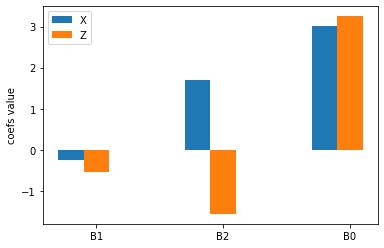

In [ ]:
plt.bar(np.array(range(3))-0.2, [regX.coef_[0], regX.coef_[1], regX.intercept_], width=0.2, label="X")
plt.bar(range(3), [regZ.coef_[0]+0.2, regZ.coef_[1], regZ.intercept_], width=0.2, label="Z")
plt.xticks(np.arange(3), ["B1", "B2", "B0"])
plt.ylabel("coefs value")
plt.legend()
plt.show()


([], [])

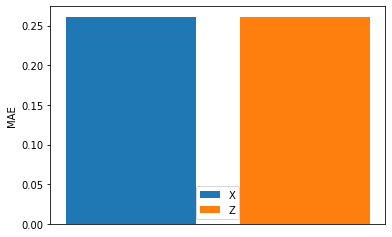

In [ ]:
errors = []
errors.append(mean_absolute_error(y, regX.predict(X)))
errors.append(mean_absolute_error(y, regZ.predict(Z)))
plt.bar([-.2], [errors[0]], width=0.3, label="X")
plt.bar([+.2], [errors[1]], width=0.3, label="Z")
plt.legend()
plt.ylabel("MAE")
plt.xticks([], [])